<a href="https://colab.research.google.com/github/csabiu/Astrostatistics/blob/main/Fisher_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from astropy.cosmology import LambdaCDM, FlatLambdaCDM
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

In [14]:
cosmo1=FlatLambdaCDM(H0=70, Om0=0.3)
cosmo2=LambdaCDM(H0=70, Om0=0.3,Ode0=0.6)
cosmo1.is_equivalent(cosmo2)

False

Text(0, 0.5, '$D_A$ [Mpc]')

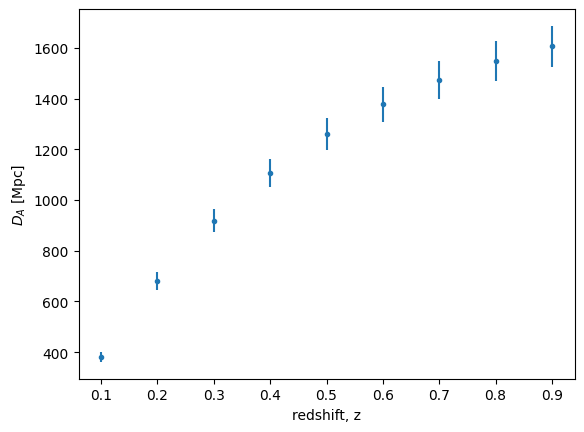

In [108]:
z=np.arange(0.1,1,0.1)
da_data=cosmo1.angular_diameter_distance(z).value
da_err=0.05*da_data

plt.errorbar(z,da_data,yerr=da_err,fmt='.')
plt.xlabel('redshift, z')
plt.ylabel(r'$D_A$ [Mpc]')

In [109]:
da_model=cosmo1.angular_diameter_distance(z).value
chi2=np.sum((da_data-da_model)**2/da_err**2)

Lets do a 1-D examination of $\Omega_m$ constraints from the $D_A$ data

Need to compute: $\frac{\partial^2\ell}{\partial\theta^2}$

In [111]:
dOm=0.01 # small delta change in parameter to compute numerical derivatives

cosmo_Om_p=FlatLambdaCDM(H0=70, Om0=0.3+dOm)
da_model_Om_p=cosmo_Om_p.angular_diameter_distance(z).value
chi2_Om_p=np.sum((da_data-da_model_Om_p)**2/da_err**2)

cosmo_Om_m=FlatLambdaCDM(H0=70, Om0=0.3-dOm)
da_model_Om_m=cosmo_Om_m.angular_diameter_distance(z).value
chi2_Om_m=np.sum((da_data-da_model_Om_m)**2/da_err**2)


Compute 2nd derivative using central finite difference formulae

In [112]:
dl2=(chi2_Om_p-2*chi2+chi2_Om_m)/dOm**2

display(Latex(r'\frac{\partial^2\ell}{\partial\Omega_M^2}='),dl2)

<IPython.core.display.Latex object>

969.1380141631845

In [113]:
display(Latex(r'\sigma_{\Omega_M}='),1/np.sqrt(dl2))

<IPython.core.display.Latex object>

0.03212234080751068

## Q. How does this improve if you have more observations of $D_A$? Try either more observations between 0<z<1 or over a larger redshift range.

Ok, lets go to the 2-D case and investigate $H_0$ and $\Omega_M$

In [114]:
dOm=0.01 # small delta change in parameter to compute numerical derivatives
dH=1

cosmo=FlatLambdaCDM(H0=70+dH, Om0=0.3+dOm)
da_model=cosmo.angular_diameter_distance(z).value
chi2_p_p=np.sum((da_data-da_model)**2/da_err**2)

cosmo=FlatLambdaCDM(H0=70-dH, Om0=0.3+dOm)
da_model=cosmo.angular_diameter_distance(z).value
chi2_m_p=np.sum((da_data-da_model)**2/da_err**2)

cosmo=FlatLambdaCDM(H0=70+dH, Om0=0.3-dOm)
da_model=cosmo.angular_diameter_distance(z).value
chi2_p_m=np.sum((da_data-da_model)**2/da_err**2)

cosmo=FlatLambdaCDM(H0=70-dH, Om0=0.3-dOm)
da_model=cosmo.angular_diameter_distance(z).value
chi2_m_m=np.sum((da_data-da_model)**2/da_err**2)

dl2_dOmdH = (chi2_m_m+ chi2_p_p- chi2_p_m - chi2_m_p)/(4*dOm*dH)
display(Latex(r'\frac{\partial^2\ell}{\partial\Omega_M\partial H_0}='),dl2_dOmdH)

<IPython.core.display.Latex object>

34.22928688057407

In [115]:
cosmo=FlatLambdaCDM(H0=70, Om0=0.3)
da_model=cosmo.angular_diameter_distance(z).value
chi2_0=np.sum((da_data-da_model)**2/da_err**2)

cosmo=FlatLambdaCDM(H0=70+dH, Om0=0.3)
da_model=cosmo.angular_diameter_distance(z).value
chi2_p=np.sum((da_data-da_model)**2/da_err**2)

cosmo=FlatLambdaCDM(H0=70-dH, Om0=0.3)
da_model=cosmo.angular_diameter_distance(z).value
chi2_m=np.sum((da_data-da_model)**2/da_err**2)

dl2_dH2=(chi2_p-2*chi2_0+chi2_m)/dH**2
display(Latex(r'\frac{\partial^2\ell}{\partial H_0^2}='),dl2_dH2)

<IPython.core.display.Latex object>

1.4702876863406182

In [144]:
A=np.zeros((2,2))

A[0,0] = dl2
A[1,1] = dl2_dH2
A[1,0] = A[0,1] = dl2_dOmdH
A

array([[969.13801416,  34.22928688],
       [ 34.22928688,   1.47028769]])

<ipython-input-161-fed80af91baf>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


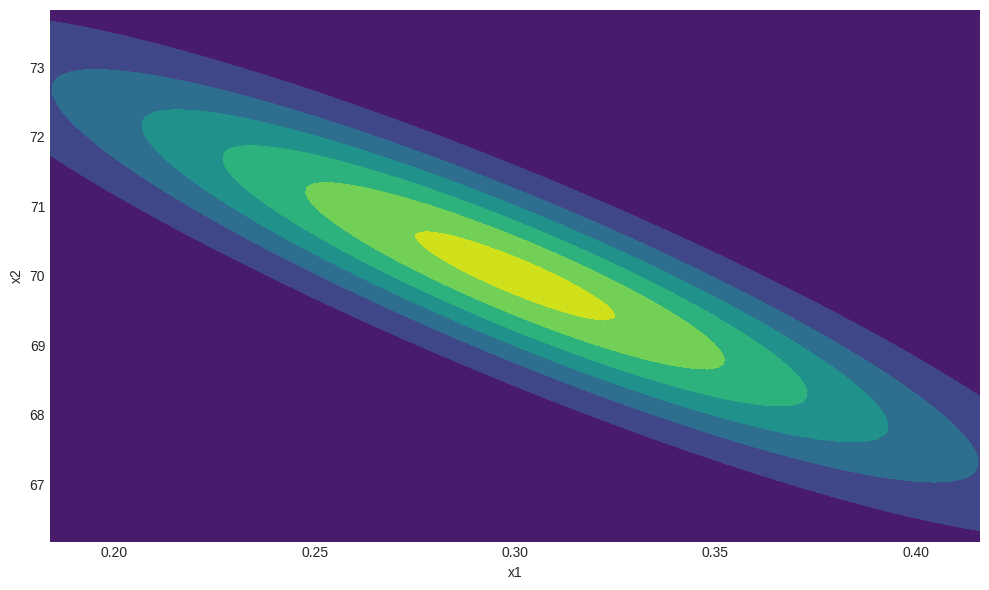

In [161]:
from scipy.stats import multivariate_normal


plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=10,6
fig = plt.figure()

# Initializing the random seed
random_seed=1000

# List containing the variance
# covariance values
#cov_val = [-0.8, 0, 0.8]

# Setting mean of the distributino
# to be at (0,0)
mean = np.array([0.3,70.])

# Storing density function values for
# further analysis
pdf_list = []



B=np.linalg.pinv(A)

# Generating a Gaussian bivariate distribution
# with given mean and covariance matrix
distr = multivariate_normal(cov = B, mean = mean,
                            seed = random_seed)

# Generating a meshgrid complacent with
# the 3-sigma boundary

mean_1, mean_2 = mean[0], mean[1]
sigma_1, sigma_2 = B[0,0], B[1,1]

x = np.linspace(mean_1-20*sigma_1, mean_1+20*sigma_1, num=100)
y = np.linspace(mean_2-1*sigma_2, mean_2+1*sigma_2, num=100)
X, Y = np.meshgrid(x,y)

# Generating the density function
# for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = distr.pdf([X[i,j], Y[i,j]])

# Plotting the density function values
#key = 131+idx
#ax = fig.add_subplot(key, projection = '3d')
#plate_scale.plot_surface(X, Y, pdf, cmap = 'viridis')
#plt.xlabel("x1")
#plt.ylabel("x2")
#plt.title(f'Covariance between x1 and x2 = {val}')
#pdf_list.append(pdf)
#ax.axes.zaxis.set_ticks([])

#plt.tight_layout()
#plt.show()

# Plotting contour plots
#for idx, val in enumerate(pdf_list):
#plt.subplot(1,3,idx+1)
plt.contourf(X, Y, pdf, cmap='viridis')
plt.xlabel("x1")
plt.ylabel("x2")
#plt.title(f'Covariance between x1 and x2 = {cov_val[idx]}')
plt.tight_layout()
plt.show()

In [137]:
distr.pdf((0.3,70))

0.010000697871246274

In [141]:
sigma_2

1.4702876863406182

In [155]:
p=np.random.multivariate_normal([0.3,70.0], np.linalg.pinv(A), 1000)

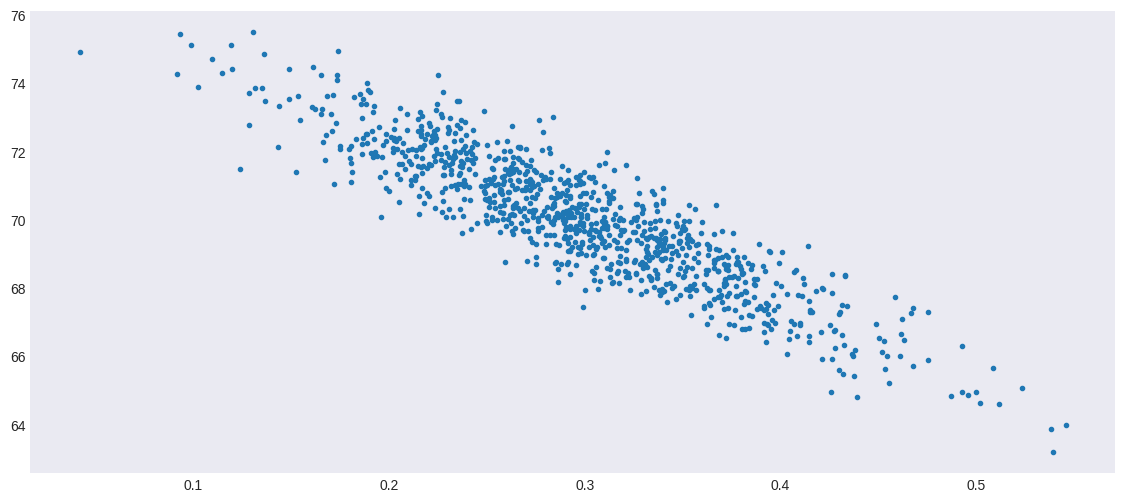

In [156]:
plt.plot(p[:,0],p[:,1],'.')